Found 7553 files belonging to 2 classes.
Found 7553 files belonging to 2 classes.
Epoch 1/10


c:\Users\Public\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.7721 - loss: 0.4502 - val_accuracy: 0.9223 - val_loss: 0.1956
Epoch 2/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.9117 - loss: 0.2121 - val_accuracy: 0.9456 - val_loss: 0.1460
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 139ms/step - accuracy: 0.9306 - loss: 0.1704 - val_accuracy: 0.9631 - val_loss: 0.0979
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.9545 - loss: 0.1247 - val_accuracy: 0.9673 - val_loss: 0.1019
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 139ms/step - accuracy: 0.9669 - loss: 0.0934 - val_accuracy: 0.9842 - val_loss: 0.0502
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.9788 - loss: 0.0648 - val_accuracy: 0.9889 - val_loss: 0.0359
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 139ms/step - accuracy: 0.9727 - loss: 0.0727 - val_accuracy: 0.9931 - val_loss: 0.0199
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.9917 - loss: 0.0262 - val

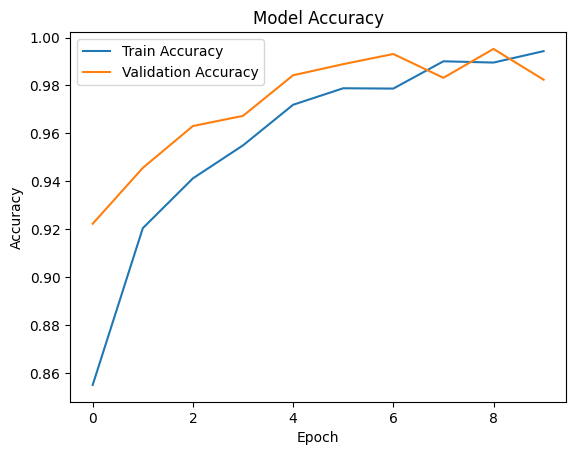

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "helmet_data/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "helmet_data/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') ])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


model.save("cnn_helmet_detector.h5")
